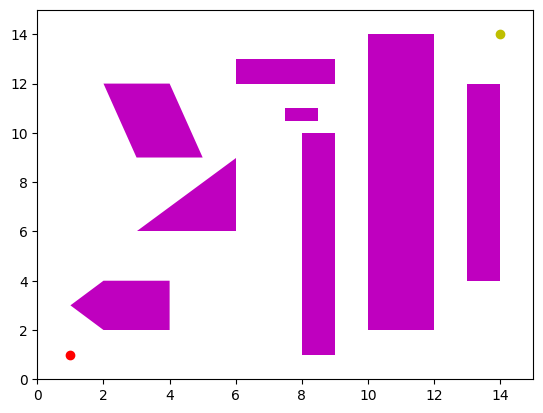

In [58]:
""" The goal of this code is to take a collection of polygons
    and returns a path that traverses the obstacles """

from search_2 import *
# This is not part of the aima-python repo.
# I took the code from "search4e.ipynb" and
# pasted it into a file called search_2 :)

from matplotlib.patches import Polygon

polygons = [[(1,1)],
            [(2,2), (4,2), (4,4), (2,4), (1,3)],
            [(3,6), (6,6), (6,9)],
            [(10,2), (12,2), (12,14), (10,14)],
            [(13,4), (14,4), (14,12), (13,12)],
            [(8,1), (9,1), (9,10), (8,10)],
            [(6,12), (9,12), (9,13), (6,13)],
            [(3,9), (5,9), (4,12), (2,12)],
            [(7.5,10.5), (8.5,10.5), (8.5,11), (7.5,11)],
            [(14,14)]]

start = polygons[0][0]
end = polygons[-1][0]

polygon_plot = []

for p in polygons:
    polygon_plot.append(Polygon(p, facecolor = 'm'))


fig,ax = plt.subplots()

# begin
ax.plot(start[0], start[1],'-ro')
# end
ax.plot(end[0], end[1],'-yo')

for p in polygon_plot:
    ax.add_patch(p)

ax.set_xlim([0,15])
ax.set_ylim([0,15])
plt.show()


In [59]:
def line_intersection(a, b, c, d):
    denom = ((a[0] - b[0]) * (c[1] - d[1]) - (a[1] - b[1]) * (c[0] - d[0]))
    if denom == 0:
        return False
    t = ((a[0] - c[0]) * (c[1] - d[1]) - (a[1] - c[1]) * (c[0] - d[0])) / denom
    u = ((a[0] - c[0]) * (a[1] - b[1]) - (a[1] - c[1]) * (a[0] - b[0])) / denom
    # check if line actually intersect
    if (0 <= t and t <= 1 and 0 <= u and u <= 1):
        return [a[0] + t * (b[0] - a[0]), a[1] + t * (b[1] - a[1])]
    else: 
        return False

def distance2(a,b):
    return (a[0] - b[0]) ** 2 + (a[1] - b[1]) ** 2

D = dict()

def intersection(u, v):
    for p in polygons:
        N = len(p)
        r = distance2(u,v)
        for i in range(N):
            if(i < N - 1):
                z = line_intersection(u, v, p[i], p[i+1])
            if(i == N - 1):
                z = line_intersection(u, v, p[N-1], p[0])
            if(z):
                r2 = distance2(u,z)
                if(r2 < r and r2 > 0):
                    return True
    return False

def self_intersection(p):
    N = len(p)
    if(N < 4):
        return
    for i in range(N-2):
        D[(p[i],p[i+2])] = True
        D[(p[i+2],p[i])] = True
    D[(p[N-2],p[0])] = True
    D[(p[N-1],p[1])] = True
    D[(p[0],p[N-2])] = True
    D[(p[1],p[N-1])] = True
    
for p in polygons:
    for q in polygons:
        if p == q:
            # We assume that the obstacles are convex
            # we need to revisit this function otherwise :)
            self_intersection(p)
            continue
        for u in p:
            for v in q:
                # We need to check if (u, v) intersects any polygon.
                # u and v are guaranteed to be on different polygons.
                if(intersection(u,v)):
                    D[(u,v)] = True



In [60]:
vertices = [x for xs in polygons for x in xs]

In [61]:
DD = dict()
for x in vertices:
    for y in vertices:
        DD[(x,y)] = True

In [62]:
for i in D:
    if(D[i]):
        DD[i] = False

lines = []
for i in DD:
    if(DD[i]):
        lines.append(i)

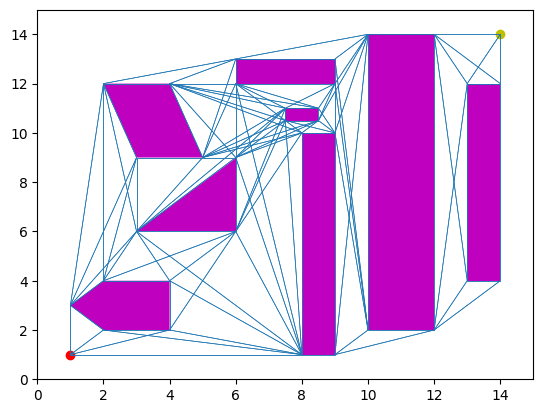

In [63]:
from matplotlib import collections  as mc

polygon_plot = []

for p in polygons:
    polygon_plot.append(Polygon(p, facecolor = 'm'))


fig,ax = plt.subplots()

# begin
ax.plot(start[0], start[1],'-ro')
# end
ax.plot(end[0], end[1],'-yo')

for p in polygon_plot:
    ax.add_patch(p)

lc = mc.LineCollection(lines, linewidths=0.5)
ax.add_collection(lc)

ax.set_xlim([0,15])
ax.set_ylim([0,15])

plt.show()

In [64]:
path_finder_map = dict()
locations = dict()

for i in DD:
    if(DD[i]):
        r = math.sqrt(distance2(i[0],i[1]))
        if r < 0.000001:
            continue
        path_finder_map[(i[0],i[1])] = r

for i in vertices:
    locations[i] = i

path_finder = Map(path_finder_map,locations)
route_problem = RouteProblem((1,1), (14,14), map=path_finder)

In [88]:
%%timeit
uniform_cost_search_route = path_states(uniform_cost_search(route_problem)) 

883 μs ± 119 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [89]:
%%timeit
breadth_first_search_route = path_states(breadth_first_search(route_problem))

471 μs ± 31.6 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [90]:
%%timeit
depth_limited_search_route = path_states(depth_limited_search(route_problem))

2.53 ms ± 109 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [91]:
%%timeit
astar_search_route = path_states(astar_tree_search(route_problem))

22 ms ± 445 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [92]:
%%timeit
weighted_astar_search_route = path_states(weighted_astar_search(route_problem))

307 μs ± 7.37 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


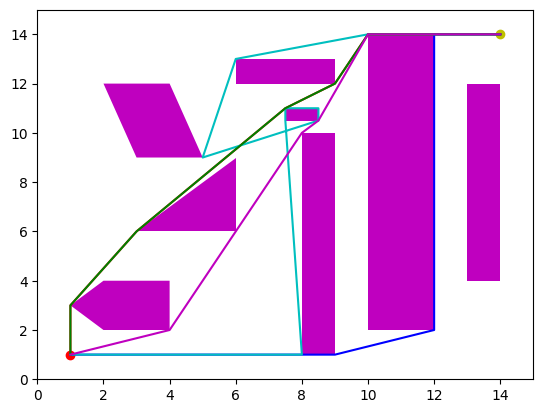

In [82]:
from matplotlib import collections  as mc

polygon_plot = []

for p in polygons:
    polygon_plot.append(Polygon(p, facecolor = 'm'))


fig,ax = plt.subplots()

# begin
ax.plot(start[0], start[1],'-ro')
# end
ax.plot(end[0], end[1],'-yo')

for p in polygon_plot:
    ax.add_patch(p)

plt.plot(*zip(*uniform_cost_search_route), color='r')
plt.plot(*zip(*breadth_first_search_route), color='b')
plt.plot(*zip(*depth_limited_search_route), color='c')
plt.plot(*zip(*astar_search_route), color='g')
plt.plot(*zip(*weighted_astar_search_route), color='m')

ax.set_xlim([0,15])
ax.set_ylim([0,15])

plt.show()

In [70]:
def calculate_path_cost(path):
    cost = 0
    N = len(path)
    for i in range(N-1):
        cost += math.sqrt(distance2(path[i], path[i+1]))
    return cost

In [83]:
uniform_cost_search_cost = calculate_path_cost(uniform_cost_search_route)
breadth_first_search_cost = calculate_path_cost(breadth_first_search_route)
depth_limited_search_cost = calculate_path_cost(depth_limited_search_route)
astar_search_cost = calculate_path_cost(astar_search_route)
weighted_astar_search_cost = calculate_path_cost(weighted_astar_search_route)
print(uniform_cost_search_cost)
print(breadth_first_search_cost)
print(depth_limited_search_cost)
print(astar_search_cost)
print(weighted_astar_search_cost)

20.37120691423263
25.162277660168378
34.5672465993875
20.37120691423263
20.62154290428604


In [87]:
report([uniform_cost_search, 
        breadth_first_search, 
        depth_limited_search,
        astar_tree_search, 
        weighted_astar_search], [route_problem])

uniform_cost_search:
      319 nodes |       45 goal |   20 cost |      51 actions | RouteProblem((1, 1), (14, 14))
      319 nodes |       45 goal |   20 cost |      51 actions | TOTAL

breadth_first_search:
      207 nodes |      208 goal |   25 cost |      34 actions | RouteProblem((1, 1), (14, 14))
      207 nodes |      208 goal |   25 cost |      34 actions | TOTAL

depth_limited_search:
      618 nodes |      570 goal |   35 cost |      93 actions | RouteProblem((1, 1), (14, 14))
      618 nodes |      570 goal |   35 cost |      93 actions | TOTAL

astar_tree_search:
    2,819 nodes |      358 goal |   20 cost |     364 actions | RouteProblem((1, 1), (14, 14))
    2,819 nodes |      358 goal |   20 cost |     364 actions | TOTAL

weighted_astar_search:
       70 nodes |       11 goal |   21 cost |      17 actions | RouteProblem((1, 1), (14, 14))
       70 nodes |       11 goal |   21 cost |      17 actions | TOTAL

